In [23]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/IDX CLustering/Indonesia Stocks Market Data Clustering.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.head()

,Unnamed: 0,Emiten_Code,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap,Cluster
0,0,AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299,28052332453475,3
1,1,ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842,292043250000,1
2,2,ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124,4330126593000,6
3,3,ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502,4212342450000,0
4,4,ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383,25639250000000,6


# By Liquidity

In [47]:
df_vol = df[["MedVol_2017", "MedVol_2018", "MedVol_2019", "Cluster"]]
df_vol.columns = ["2017", "2018", "2019", "Cluster"]
df_vol.head()

,2017,2018,2019,Cluster
0,0.043038,0.044501,0.030834,3
1,0.000082,0.022543,0.602394,1
2,0.000000,0.000000,0.000000,6
3,0.000000,0.000000,0.000002,0
4,0.049275,0.039534,0.069498,6


In [48]:
vol = pd.melt(df_vol, "Cluster", var_name="Year", value_name="Value")
vol.head()

,Cluster,Year,Value
0,3,2017,0.043038
1,1,2017,0.000082
2,6,2017,0.000000
3,0,2017,0.000000
4,6,2017,0.049275


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


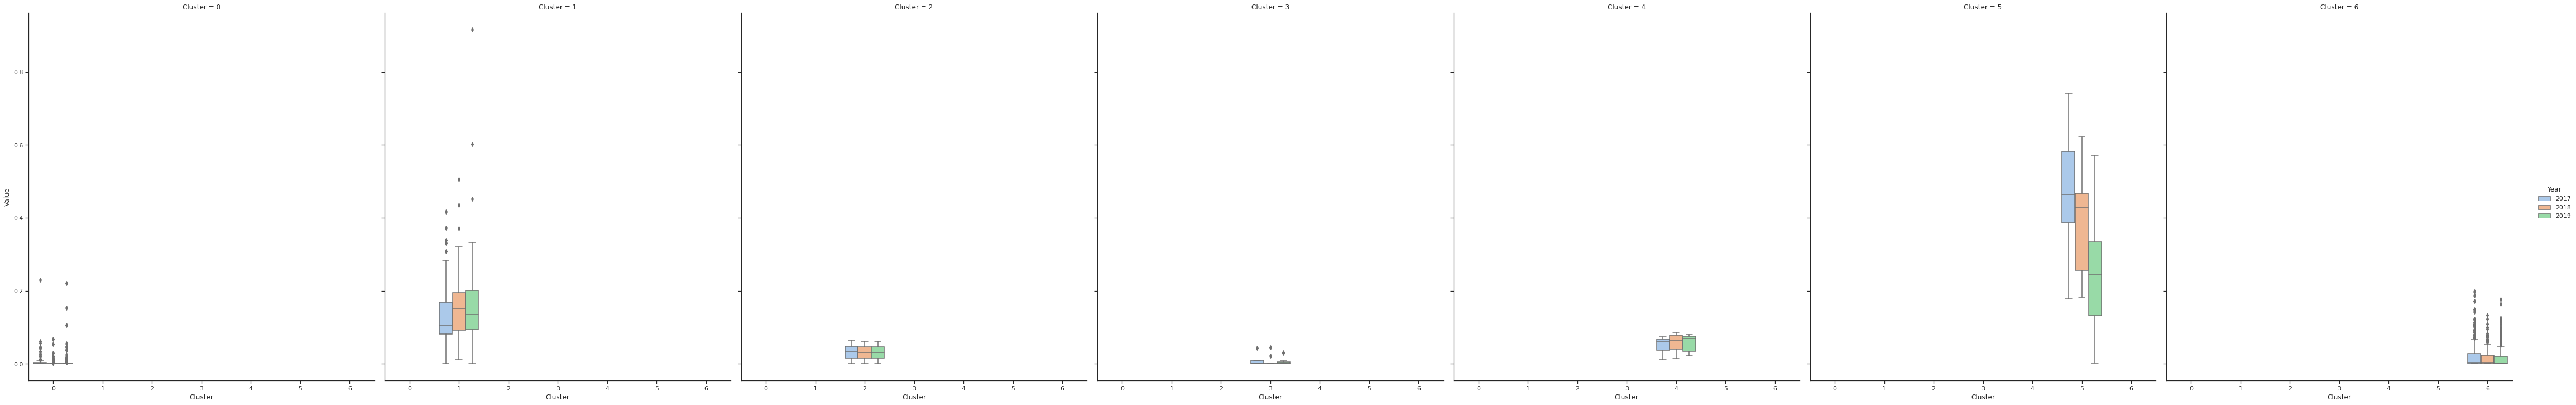

In [81]:
fig_dims = (100, 50)
sns.set_theme(style="ticks", palette="pastel")
sns.factorplot(x = "Cluster", y="Value", hue="Year", col = "Cluster", data=vol, kind="box", height=10, aspect=.9)

In [10]:
vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedVol_2017  496 non-null    float64
 1   MedVol_2018  496 non-null    float64
 2   MedVol_2019  496 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


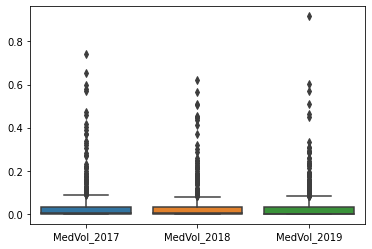

In [11]:
import seaborn as sns
sns.boxplot(data=vol)

# By Volatility

In [68]:
df_vola = df[["SdClose_2017", "SdClose_2018", "SdClose_2019", "Cluster"]]
df_vola.columns = ["2017", "2018", "2019", "Cluster"]
df_vola.head()

,2017,2018,2019,Cluster
0,13.971410,0.021353,0.018299,3
1,0.007558,0.069875,0.056842,1
2,2.514334,0.019688,0.033124,6
3,1.384784,0.048413,0.049502,0
4,0.036339,0.023354,0.020383,6


In [71]:
vola = pd.melt(df_vola, "Cluster", var_name="Year", value_name="Value")
vola.head()

,Cluster,Year,Value
0,3,2017,13.971410
1,1,2017,0.007558
2,6,2017,2.514334
3,0,2017,1.384784
4,6,2017,0.036339


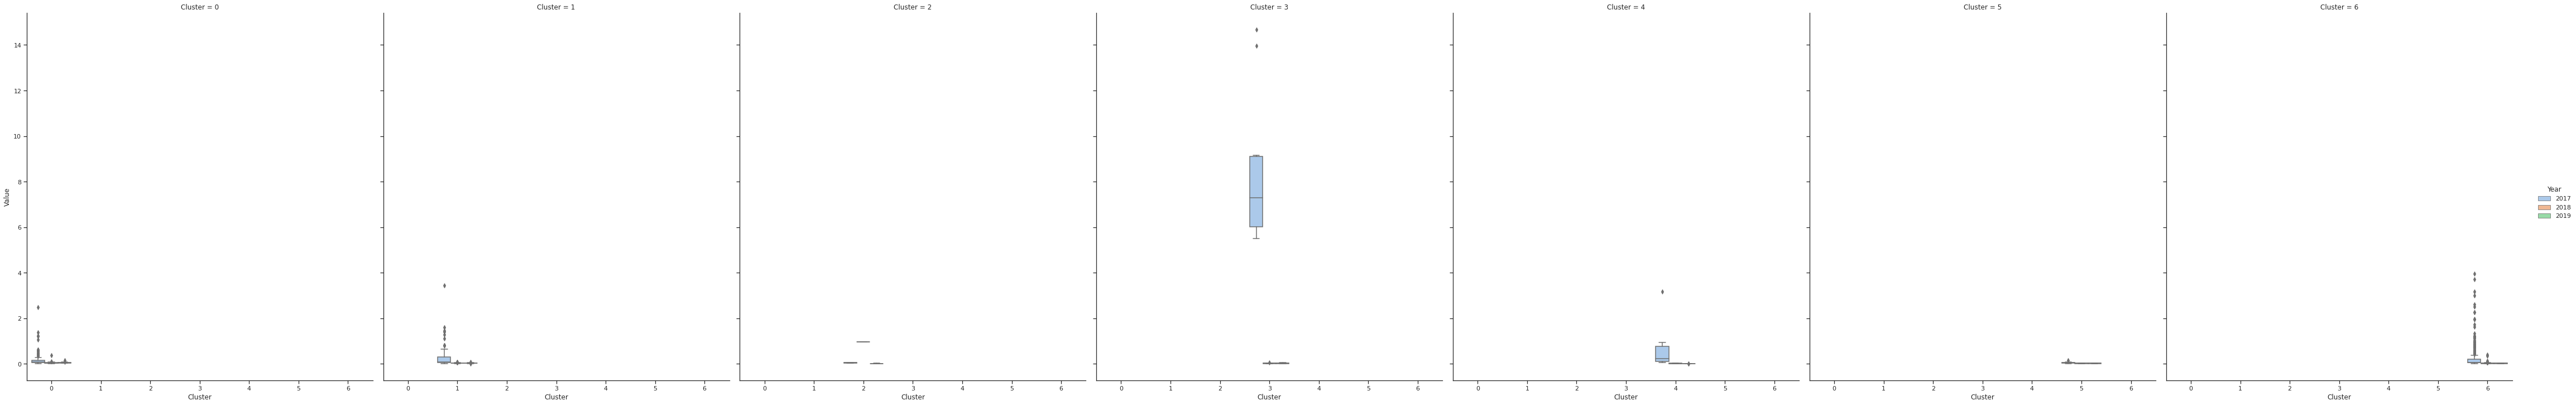

In [82]:
fig_dims = (100, 50)
sns.set_theme(style="ticks", palette="pastel")
sns.catplot(x = "Cluster", y="Value", hue="Year", col = "Cluster", data=vola, kind="box", height=10, aspect=.9)

# By Market Cap

In [58]:
df_cap = df[["Market_Cap", "Cluster"]]
cap_mean = df_cap.groupby(by="Cluster").mean()
cap_mean.head()

,Market_Cap
Cluster,
0,2.493618e+12
1,1.659260e+13
2,9.844548e+12
3,1.262718e+13
4,4.208694e+14


In [59]:
cap_mean.reset_index(inplace=True)

Text(0, 0.5, 'Mean of Market Capital')

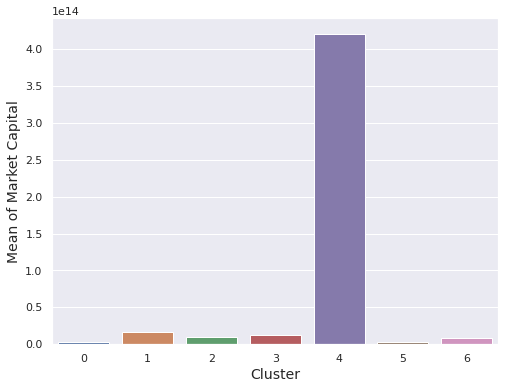

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Cluster", y="Market_Cap", data=cap_mean)

plt.xlabel("Cluster", size=14)
plt.ylabel("Mean of Market Capital", size=14)